In [1]:
#(a)
from scipy.io import loadmat
import numpy as np
#import random
import datetime
hw4data = loadmat('hw4data.mat')

In [2]:
data = np.array(hw4data['data'],dtype= float)
labels = np.array(hw4data['labels'],dtype= int).flatten()
data = np.column_stack(((np.ones(len(data))),data))
labels = labels.astype(float)

In [4]:
def grad(inprod,labels,data):
    return np.sum(np.multiply( 1/(1+np.exp(-inprod))-labels ,data.T).T,axis=0)/len(labels)

In [5]:
def objfun(inprod, labels):
    return np.sum(np.log(1+np.exp(inprod))-np.multiply(labels,inprod))/len(labels)

In [6]:
def grad_LR(data,labels):
    if data.shape[0] != len(labels):
        raise Exception('invalid input')
    else:
        n = 0 
        obj = 1
        b = np.zeros(data.shape[1])
        while obj > 0.65064:
            eta = 1
            inprod = np.dot(data,b) #inner product
            gradi = grad(inprod,labels,data)
            inprod1 = np.dot(data,b-eta*gradi)
            while objfun(inprod1,labels) > objfun(inprod,labels) - 0.5 * eta * np.dot(gradi,gradi):
                eta = eta / 2
                inprod1 = np.dot(data,b-eta*gradi)
            b = b - eta * gradi
            n = n + 1
            inprod = np.dot(data,b)
            obj = objfun(inprod,labels)
        return n

In [6]:
print( grad_LR(data,labels))

4658

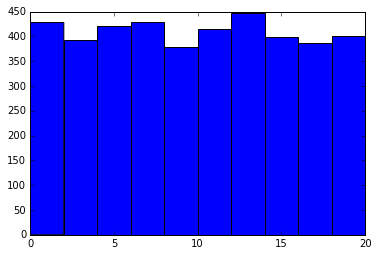

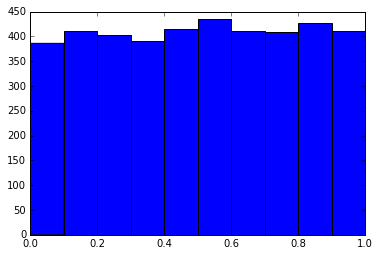

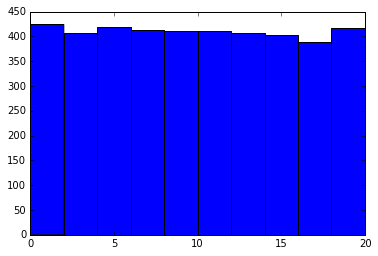

In [51]:
#(b)
fea = np.array(hw4data['data'],dtype= float).T #feature
import matplotlib.pyplot as plt
for i in range(3):
    plt.hist(fea[i])
    plt.show()

In [7]:
M = np.diag([1,1/20,1,1/20])
data_trans = np.dot(data,M)
print( grad_LR(data_trans,labels))

377


In [14]:
#(c)

def errate(teda, tela, b):
    if len(teda) == len(tela):
        M = np.dot(teda,b)
        M[M<=0]=0
        M[M>0]=1
        return np.count_nonzero(M - tela.astype(int))/float(len(tela))
    else:
        raise Exception('invalid input')

In [15]:
def grad_LR_d(data,labels,teda,tela):
    if data.shape[0] != len(labels):
        raise Exception('invalid input')
    else:
        n = 0 
        obj = 1
        b = np.zeros(data.shape[1])
        i = 2
        while True:
            eta = 1
            inprod = np.dot(data,b) #inner product
            gradi = grad(inprod,labels,data)
            inprod1 = np.dot(data,b-eta*gradi)
            while objfun(inprod1,labels) > objfun(inprod,labels) - 0.5 * eta * np.dot(gradi,gradi):
                eta = eta / 2
                inprod1 = np.dot(data,b-eta*gradi)
            b = b - eta * gradi
            n = n + 1
            inprod = np.dot(data,b)
            obj = objfun(inprod,labels)
            if n == i:
                if i == 2:
                    error_best = errate(teda, tela, b)
                i = i * 2
                error_new = errate(teda, tela, b)
                if error_new / error_best > 0.99 and n >= 32:
                    break
                if error_best > error_new:
                    error_best = error_new
        return n, obj, error_new

In [19]:
import math
hold = math.floor(len(data)*0.8)
trda = data[:hold] #training data
trla = labels[:hold] #training labels
teda = data[hold:]
tela = labels[hold:]

In [20]:
print(grad_LR_d(trda,trla,teda,tela))

(512, 0.65506962345974018, 0.3829268292682927)


In [16]:
#transformed
trda_tr = data_trans[:hold] #training data
trla = labels[:hold] #training labels
teda_tr = data_trans[hold:]
tela = labels[hold:]

In [18]:
print(grad_LR_d(trda_tr,trla,teda_tr,tela))

(32, 0.66476485897084503, 0.37926829268292683)
